<a href="https://colab.research.google.com/github/moripova/Data-Science-Projects/blob/main/Full_Code_Project_2_MO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center><font size=10>Data Science and Business Analytics</center></font></h1> 
<h1><center>Project Business Statistics: E-news Express/Full Code</center></h1>
<h1><center>Mavluda Oripova </center></h1>

---
---


**Marks: 60**

<center><img src="https://www.sciencefriday.com/wp-content/uploads/2016/05/shutterstock_131496704.jpg" width="500" height="300"></center>

<b><h2><center> E-news Express Case Study</center></h2></b>

# **Defining Problem Statement and Objectives**

---



---



## **Business Context**
The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting news electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[*Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.*]

## **Objective**
The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group).

Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?

2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

3. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

4. Is the time spent on the new page the same for the different language users?

## **Data Dictionary**
The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

**user_id** - Unique user ID of the person visiting the website

**group** - Whether the user belongs to the first group (control) or the second group (treatment)

**landing_page** - Whether the landing page is new or old

**time_spent_on_the_page** - Time (in minutes) spent by the user on the landing page

**converted** - Whether the user gets converted to a subscriber of the news portal or not

**language_preferred** - Language chosen by the user to view the landing page

# **Importing all the necessary libraries**



---



---



In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Library to help with statistical analysis
import scipy.stats as stats 


In [ ]:
#Since we are using Google Colab, we will be connecting our notebook to the google drive where our data sets are located:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#We will load the data set to the notebook: 
df=pd.read_csv('/content/drive/MyDrive/PYTHON/Statistics/Project 2/abtest.csv')


## **Reading the Data into a DataFrame**


---



---



In [ ]:
# We can run the data to preview the first 5 rows:
df.head(5)

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


**Observations:**

We can confirm that the dataset has 6 columns as mentioned in the Data Dictionary. 

In [ ]:
# It will help to copy the data to another variable so we could avoid the changes to the original data:
data_copy=df.copy()

# **Exploring the dataset and extracting insights using Exploratory Data Analysis**


---



---



- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

### **Viewing the first few rows of the dataset**




In [ ]:
# We can run the data to preview the first 10 rows:
df.head(10)

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish
5,546558,control,old,5.28,yes,English
6,546448,treatment,new,5.25,yes,French
7,546581,control,old,6.53,yes,Spanish
8,546461,treatment,new,10.71,yes,French
9,546548,control,old,2.08,no,English


In [ ]:
# We can also view the last 10 raws of the dataset:
df.tail(10)

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
90,546477,treatment,new,5.40,no,French
91,546451,treatment,new,8.47,yes,English
92,546566,control,old,8.35,no,French
93,546474,treatment,new,4.94,no,French
94,546550,control,old,3.05,no,English
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English



**Observations:** 

*   The data contains 6 columns with variables presented in the dictionary: user id, group, landing page, time spent on the page, converted, language preferred. The last raw goes to 100 (99 in Python).



 



### **Checking the shape of the data - number of total rows and columns**

In [ ]:
#To check for the number of rows and columns in the dataset, we will need to run the df.shape command:
df.shape

(100, 6)

**Ovservations:**

We see that there are total of 100 rows and 6 columns.

### **Checking the data types of the columns**

In [ ]:
# Now we will check of type of data each column consists of. For this we will run the df.info command:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


**Observations:**

From the df.info command we retrieved the type of the data in each column. The results are: **user_id** is an integer; **group** and **landing_page** are objects; **time_spent_on_the_page** is float; **converted** and **language_preferred columns** are ofjects. There are **2 numeric** and **4 string** values in total. 

### **Checking the statistical summary of the numeric values in the dataset.** 

In [ ]:
# To check the statistical summary of the numeric values we will be running df.describe command:
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


**Observations:**

From this output we can say that there are 100 users in the dataset. On the time_spent_on_the_page column we can say that the average time the users spent - **mean** of this column- is 5.3, the **minimum** 0.19, **25%** 3.8, **50%** 5.4,**75%** 7.0, and the **maximum** is 10.7 minutes.

In [ ]:
# we can create a variable that includes only categorical data and run the value count. It will help to separate the columns to better view the data.
cat_cols=['brand_name_Karbonn']
for column in cat_cols:
    print(df[column].value_counts())
    print("-" * 50)
  

NameError: ignored

**Observations:**

*From analysis of categorical data we can say that the 100 users were classified into two groups: control (50) and treatment (50). 

*We can also see that there are two landing pages, new and old (split in two groups of 50 users). 

*The "converted" column has two values (yes and no), with the numbers distributes as 54 (yes) and 46(no). 

*In the language_preferred column, out of all 100 users, 34 have Spanish, 34 have French, and 32 have English

### **Checking for Missing Values**

In [ ]:
df.info()# by running this formula we can double check the data types for assurance.
df.isnull().sum()# this formula will help us see how many columns have missing data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

**Observations:**

By looking into the data type information we can assure that there are 100 total entries in the dataset and each of the 6 columns has 100 non-null count values. By running the df.isnull().sum we can clearly see that none of the columns have missing values.

### **Checking for duplicates**


In [ ]:
# To check for duplicate values we will run df.duplicated()code:
df.duplicated().sum()

0

**Observations:**

There are no duplicate values in the dataset.

# **Univariate Analysis**

---



---



As a next step, we will be conducting univariate analysis, looking at each variable separately.

### **Group Analysis**

In [ ]:
# First we will count the number of values in each category of the column:
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

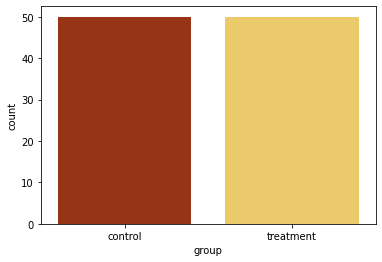

In [ ]:
# Then we plot a bar graph for the "group" column:
sns.countplot(data = df, x = 'group',palette='afmhot');

**Observations:**

*   The group column in the dataset includes two categories: control and treatment.
*   There are equal number of values in each categorie: control - 50, and treatment - 50.



### **Landing Page Analysis**

In [ ]:
# First we will count the number of values in each category of the column:
df['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

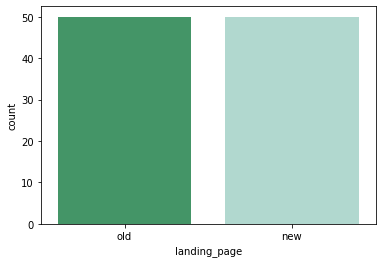

In [ ]:
# Then we plot a bar graph for the column "landing_page":
sns.countplot(data = df, x = 'landing_page',palette='BuGn_r');

**Observations:**

*   The landing_page column has two categorical values: old and new.
*   The number of users, value count, on each categorie is equal: old-50, new-50.



### **Time Spent on the Page**

Sample mean = 5.377800000000001


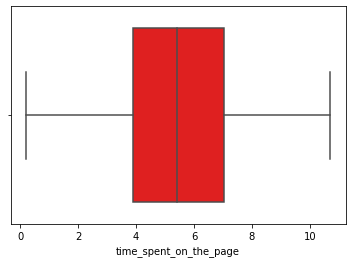

In [ ]:
# To get the summary of the five major values for the "time spent on the page" column, we can run the boxplot:
sns.boxplot(data=df,x='time_spent_on_the_page',color='red')
print('Sample mean =',df['time_spent_on_the_page'].mean())
plt.show()

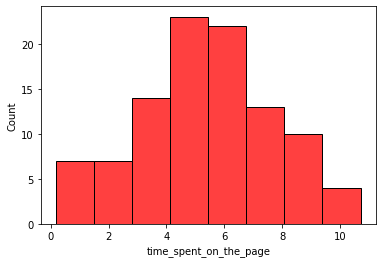

In [ ]:
# We can find the distribution of the values through histplot:
sns.histplot(data=df,x='time_spent_on_the_page',color='red') 
plt.show()

**Observations:**

*   The average (**mean**) time spent on the page is 5.37 minutes.
*   The **minimum time** is 0.19 minutes and the **maximum** is 10.7 minutes.From the graphs we see that there are no values above the maximum and minimum, values,meaning there are **no outliers**.
*   From the graphs we can see the data is **normally distributed**.






### **Converted Analysis**

In [ ]:
# First we will count the number of values in each category of the column:
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

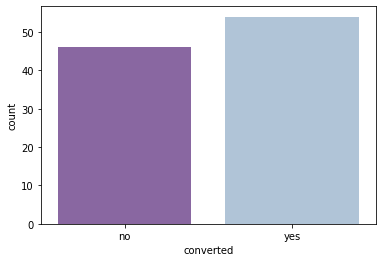

In [ ]:
# Then we plot a bar graph for the column "converted":
sns.countplot(data = df, x = 'converted',palette='BuPu_r');
plt.show()

**Observations:**



*   We can see that the 'converted'column has two categorical values: yes and no (whether the user gets converted to a subscriber or not). From the simple count function we see that 54 out of 100 users converted to a subscriber (yes) and 46 out of 100 users chose not to convert to a subscriber (no) of the news portal.  




### **Language Preferred Analysis**

In [ ]:
# First we will count the number of values in each category of the column:
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

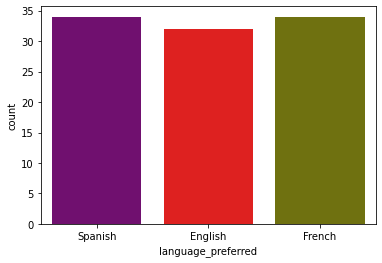

In [ ]:
# Then we plot a bar graph for the column "language_preferred":
sns.countplot(data = df, x = 'language_preferred',palette='brg');
plt.show()

**Observations:** 

From the analysis of this categorical variable we can tell that there are three languages the users chose from, English/Spanish/French. The number of users choosing these three languages is almost equally distributed: English (32), Spanish (34) and French (34). 

# **Bivariate Analysis**

---



---




In bivariate analysis we will analyze any correlation that might exist between the variables.



### **Time Spent on the Page vs Landing Page**

In [ ]:
# We can see the mean time spent on each landing page by running the groupby funtion:
landing_page_mean=df.groupby('landing_page').mean()[['time_spent_on_the_page']]
landing_page_mean

,time_spent_on_the_page
landing_page,
new,6.2232
old,4.5324


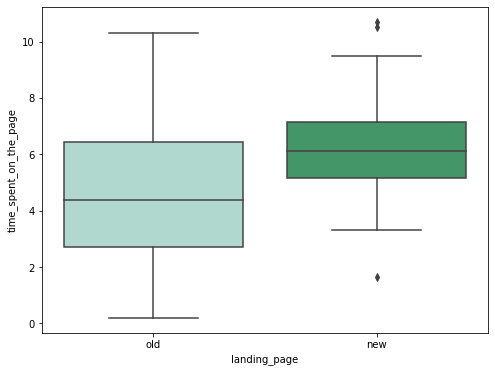

In [ ]:
# We can also use the boxplot to see the five number summary of the data: 
plt.figure(figsize=(8,6))
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page',palette='BuGn')
plt.show()

**Observations:**



*   From the correlational analysis betweent landing page and time spent on the page we can clearly see that the new landing page has a higher averge time spent (6.2 minutes) compared to the old page (4.5 minutes)
*   The boxplot shows us that the old page has a wider distribution of the time spent, with the minimum time being 0.19 minutes and the maximum time going upto arount 10 minutes. The  new landing page has the minimum time spent around 3 minutes and the maximum around 9 minutes.
* While the mean of the time spent for the new landing page is higher than the old page, so are the 25% and 75% of the data groups: new page 25% time spent - 5 minutes vs old page 25% time spent - around 3 minutes; new page 75% of time spent - 7 minutes vs old page 75% time spent - 6.3 minutes.
* The old page does not have outliers in respect to the time spent on page. The new page has three outliers - around 1.8 minutes (below the minimum of 3 minutes) and more than 10 minutes (above the maximum time of 10 minutes)




### **Converted vs Time Spent on the Page**

In [ ]:
# We can see the mean time spent on the converstion status by running the groupby funtion:
converted_time_mean=df.groupby('converted').mean()[['time_spent_on_the_page']]
converted_time_mean

,time_spent_on_the_page
converted,
no,3.915870
yes,6.623148


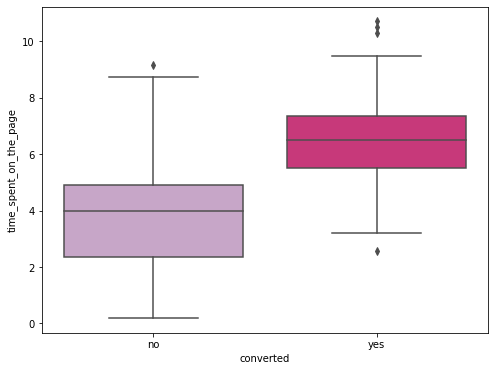

In [ ]:
# We can also use the boxplot to see the five number summary of the data: 
plt.figure(figsize=(8,6))
sns.boxplot(data=df,x='converted',y='time_spent_on_the_page',palette='PuRd')
plt.show()


**Observations:**


*  The correlational analysis of the time spent on page and conversion status clearly shows that more time users spend on the page, there is more possibility that they convert to a subscriber status. The mean difference between time spent of the converted users vs time spent of non-converted users is big: 6.6 vs 3.9. People who decided to subscribe spent nearly double more time then people who are not subscribed.
* The similar trend can be observed in other time frames: converted group has higher 25% frame - 6 minutes vs 2.3 non-converted and 75% frame - around 7 minutes vs 5 minutes.
* The distribution of time among non-converted is higher then the converted group. The minimum time spent on non-converted group is around 0.2 and the maximum is around 9 minutes. The minimum time spent on the converted group is around 2.3 minutes and the maximum is around 9 minutes.   
* Non-converted group has one outlier which lies above the maximum framework. The converted group has an outlier below the minimum and several above the maximum (9 minutes) framework.



### **Language Preferred vs Time Spent on the Page**

In [ ]:
# We can see the mean time spent on the converstion status by running the groupby funtion:
language_time_mean=df.groupby('language_preferred').mean()[['time_spent_on_the_page']]
language_time_mean

,time_spent_on_the_page
language_preferred,
English,5.559062
French,5.253235
Spanish,5.331765


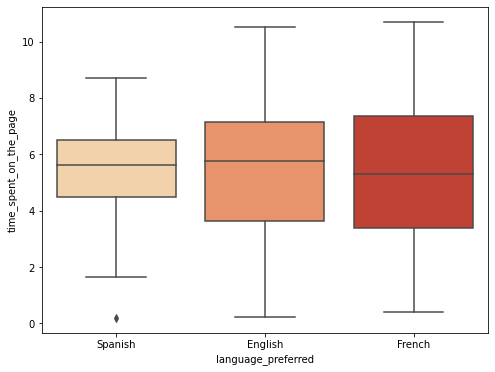

In [ ]:
# We can also use the boxplot to see the five number summary of the data: 
plt.figure(figsize=(8,6))
sns.boxplot(data=df,x='language_preferred',y='time_spent_on_the_page',palette='OrRd')
plt.show()


**Observations:**


*   From the analysis of the preferred language and time spent on page we can see that the means of time spent for all three available languages are very close: **English** 5.5, **French** 5.2, and **Spanish** 5.3 minutes.
* In the boxplot data analysis we found that Spanish language has the major diffence in the minimum and maximum times, as well as 25% and 75% frames: **Spanish** min time - 1.8, max time 8.8, 25% 4.3, 75% 6.2 minutes; **French** min time 0.4, max time 10.5, 25% 3.8 minutes, and 75% is around 7  minutes. **English** is very close to French, with min time 0.4, max time 10.3, 25% 3.8, and 75% around 6.8 minutes. 
*   English and French does not have any outliers in the dataset. Spanish language has one outlier that lies below the minimum level (1.8) - around 0.20 minutes.



### **Language Preferred vs Converted**

In [ ]:
# First it will  help to count the number of values in each category of the language preferred data:
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

In [ ]:
# Then, we need to create a variable to separate converted (yes) from the 'converted'data:
df_converted = df[df['converted'] == 'yes']
# Next, we run the value count for the df_converted data based on the language preferred:
df_converted['language_preferred'].value_counts()

English    21
Spanish    18
French     15
Name: language_preferred, dtype: int64

In [ ]:
# We can also run the value count as a percentage:
df_converted['language_preferred'].value_counts(normalize=True)

English    0.388889
Spanish    0.333333
French     0.277778
Name: language_preferred, dtype: float64

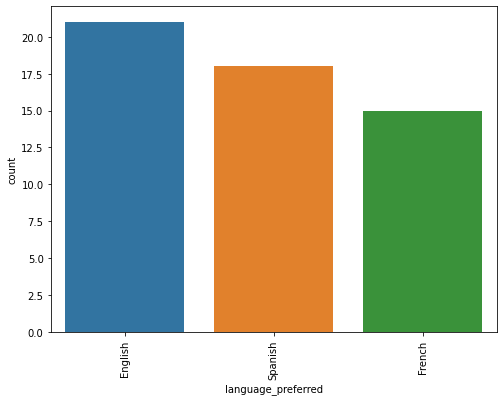

In [ ]:
# To visualize the data, we can create a countplot 
plt.figure(figsize = (8,6))
sns.countplot(data = df_converted, x = 'language_preferred'); 
plt.xticks(rotation=90)
plt.show()

**Observations:**

*   From the analysis of the converted users based on their preferred language we can see that regardless of the English language users being less in total (32) compared to Spanish (34) and French (34), the number of converted users are noticably higher: English (21/38%) vs Spanish (18/33%) vs French (15/27%)




### **Landing Page vs Converted Users**

We can analyze how many users of new and old landing page converted to a subscriber 

In [ ]:
# First let us check again on the count for each category in the landing page data:
df['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

In [ ]:
# Then, we need to create a variable to separate converted users (yes) from the 'converted' dataset:
df_converted = df[df['converted'] == 'yes']
# Next, we run the value count for the df_converted based on the landing page:
df_converted['landing_page'].value_counts()

new    33
old    21
Name: landing_page, dtype: int64

In [ ]:
# We can also run the value count as a percentage:
df_converted['landing_page'].value_counts(normalize=True)

new    0.611111
old    0.388889
Name: landing_page, dtype: float64

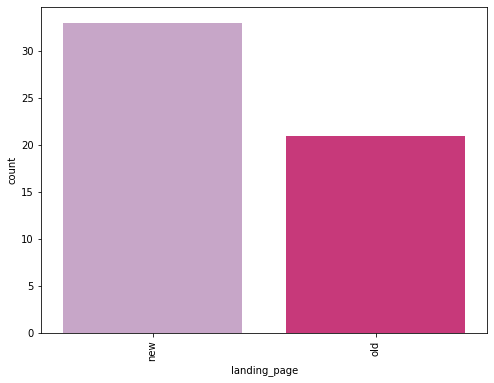

In [ ]:
# To visualize the data, we can create a countplot 
plt.figure(figsize = (8,6))
sns.countplot(data = df_converted, x = 'landing_page', palette='PuRd'); 
plt.xticks(rotation=90)
plt.show()

**Observations:**


*   The number of users assigned to Old and New landing pages was equal=50 in each group.
*   Out of 50 users of the new landing page, 33/61% converted to a subscriber. Out of 50 users of the old landing page, 21/38% converted to a subscriber, which is lower than the converted status on the new page users. 



# **Hypothesis Testing**

---



---



## **1. Do the users spend more time on the new landing page than the existing landing page?**





### Visual Analysis

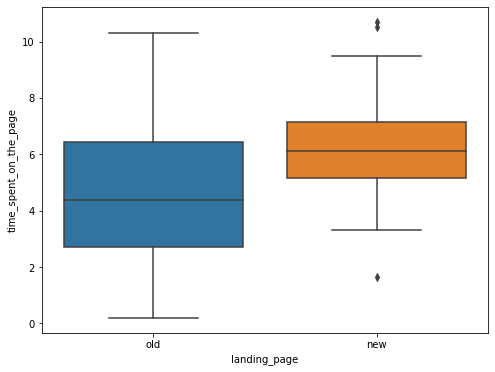

In [ ]:
# visual analysis of the time spent on the new page and the time spent on the old page
plt.figure(figsize=(8,6))
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = df)
plt.show()

**Observations**:


*   From the visual analysis we can observe that the users spend more time on the new landing page than on the old page: 6.2 minutes average on new page vs 4.5 minutes average on old page.
*   While the mean of the time spent for the new landing page is higher than the old page, so are the 25% and 75% of the data groups: new page 25% time spent - 5 minutes vs old page 25% time spent - around 3 minutes; new page 75% of time spent - 7 minutes vs old page 75% time spent - 6.3 minutes.


### *Step 1: Defining the null and alternate hypotheses*


The null and alternative hypotheses for this case can be formulated as follows:



$H_0$: Users spend equal time on the new landing page and the existing landing page.

$H_a$: Users spend more time on the new landing page than the existing landing page.







Let $\mu_1, \mu_2$ be the mean of time spent on the **new landing** page and **existing landing page** groups respectively.



Mathematically, the above formulated hypotheses can be written as:

>$H_0:\mu_1=\mu_2$

against the alternate hypothesis

>$H_a:\mu_1>\mu_2$

### *Step 2: Selecting Appropriate test*

This is a case concerning two independed populations, treatment and control group, and two population means. A two independent sample test will be the right test. As the population standard deviation is unknown, t-test will be appropriate to test the formulated hypotheses. And based on the alternative hypotheses this is a one-tailed test concerning two population means.  **Two Independent Sample T-Test** will be the most appropriate test.   

**Two Independent Sample T-Test is used to compare the sample means from 2 independent populations when the std devs are unknown.**                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

### *Step 3: Deciding the significance level* 

Based on the problem statement, to determine the effectiveness of the new landing page in gathering new subscribers for the news portal,  we will perform a statistical analysis at a significance level of 5%:
 $\alpha = 0.05$.

### *Step 4: Collecting and preparing data* 



To ensure that our selected test, Two Independent Sample T-Test, meets the assumptions, we will run the necessary tests. 

**Shapiro-Wilk’s test**

Shapiro_Wilk test is used to test for normality.

We will test the null hypothesis

>$H_0:$ The time spent on the page follow a normal distribution

against the alternative hypothesis

>$H_a:$ The time spent on the page do not follow a normal distribution

In [ ]:

# We will use the shapiro function for the scipy.stats library for this test
w, p_value = stats.shapiro(df['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.5643684267997742


**Observations**:

Since p-value of the test is larger than the 5% significance level, we fail to reject the null hypothesis that the response follows the normal distribution.

**Comparing the standard deviation of the samples:**

In [ ]:
# create subsetted data frame for new landing page users 
time_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']

# create subsetted data frame for old landing page users
time_spent_old = df[df['landing_page'] == 'old']['time_spent_on_the_page'] ##Complete the code

In [ ]:
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_new.std(),2))
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_old.std(),2))

The sample standard deviation of the time spent on the new page is: 1.82
The sample standard deviation of the time spent on the new page is: 2.58


**Observations**:

The results of the comparison showed unequal population standard deviations

### **Let's summarize whether the T-test assumptions are satisfied or not:**

**Continuous data** - Yes, the time spent data is measured on a continuous scale.

**Normally distributed populations** - Since the sample sizes are greater than 30 (50 in each sample group), Central Limit Theorem states that the distribution of sample means will be normal. In addition, the test of Shapiro-Wilk's supported the claim of normality.  

**Independent populations** - As we are taking random samples for two different groups, the two samples are from two independent populations.

**Unequal population standard deviations** - As the sample standard deviations are different, the population standard deviations may be assumed to be different.

**Random sampling from the population**  - Yes, we are informed that the collected sample a simple random sample.

**We can use two sample T-test for this problem.**

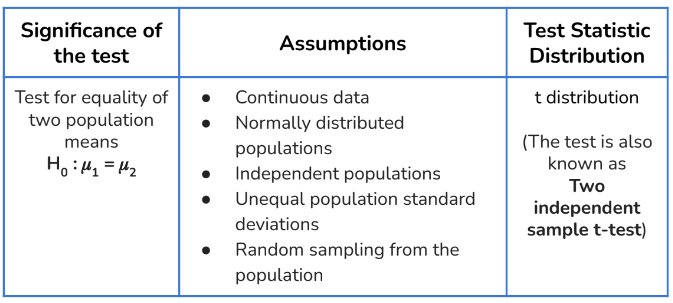

### *Step 5: Calculating the p-value*

In [ ]:
# We will run the code to import the required function
from scipy.stats import ttest_ind

# write the code to calculate the p-value
test_stat, p_value =  ttest_ind(time_spent_new, time_spent_old, equal_var = False, alternative = 'greater') 

print('The p-value is', p_value)

The p-value is 0.0001392381225166549


### Step 6: Comparing the p-value with $\alpha$

In [ ]:
# We will print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


**Observations**:

As the p-value (~0.00013) is much less than the level of significance  ($\alpha = 0.05$.), we can reject the null hypothesis. Hence, we do have enough evidence to support the claim that users spent more time on the new landing page than on the existing page.

### Step 7:  Drawing inference

**Insights:**

1. To test the alternative hypotheses that users spent more time on the new landing page than on the existing page, we used **Two Independent Sample T-test for Equality of Means - Unequal Std Dev**. 
2. All the T-Test assumptions were satisfied.
3. The p-value (~0.00013) is much less than the level of significance ( α=0.05 .), we can reject the null hypothesis. Hence, we do have enough evidence to support the claim that users spent more time on the new landing page than on the existing page.

**Conclusion**: The users spend more time on the new landing page than the existing landing page.

## **2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?**

### Visual Analysis 

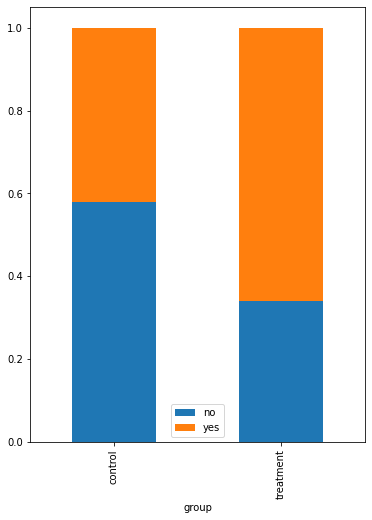

In [ ]:
# We can run the crosstab to see the rate of converted vs non-converted users in each group
pd.crosstab(df['group'],df['converted'],normalize='index').plot(kind="bar", figsize=(6,8),stacked=True)
plt.legend()
plt.show()

In [ ]:
# Let's create a variable to separate converted users (yes) from the 'converted' dataset:
df_converted = df[df['converted'] == 'yes']
# Next, we run the value count for the df_converted based on the landing page:
df_converted['landing_page'].value_counts()

new    33
old    21
Name: landing_page, dtype: int64

In [ ]:
# It will help to run the value count as percentage for the number of converted users:
df_converted['landing_page'].value_counts(normalize=True)

new    0.611111
old    0.388889
Name: landing_page, dtype: float64

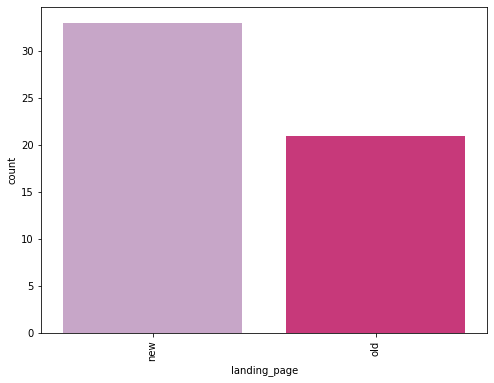

In [ ]:
# To visualize the data, we can create a countplot 
plt.figure(figsize = (8,6))
sns.countplot(data = df_converted, x = 'landing_page', palette='PuRd'); 
plt.xticks(rotation=90)
plt.show()

**Observations:**

* Number of converted users in the treatment group is greated than in the control group.

*   The number of users assigned to Old and New landing pages was equal=50 in each group.
*   The visual analysis showed that out of 50 users of the new landing page, 33/61% converted to a subscriber. Out of 50 users of the old landing page, 21/38% converted to a subscriber, which is lower than the converted status on the new page users. 

### *Step 1: Defining the null and alternate hypotheses*





- 'convertion rate' and 'landing page' are two categorical variables.
- We want to see if the proportion of converted users of the new landing page is significantly greater from the proportion of converted users of the existing landing page population

**The null and alternative hypotheses for this case can be formulated as follows:**



$H_0$: The proportion of converted users of the new landing page is equal to the proportion of converted users of the existing page.

$H_a$: The proportion of converted users of the new landing page is greater than the proportion of converted users of the existing page.

**Let's write the null and alternative hypothesis**:


Let $p_1,p_2$ be the proportions of converted users in the **New Landing Page** (Treatment Group) and **Existing Landing Page** (Control Group) respectively.

We will test the null hypothesis

>$H_0:p_1 =p_2$

against the alternate hypothesis

>$H_a:p_1 > p_2$

### *Step 2: Selecting Appropriate test*

This is a one-tailed test concerning two population proportions from two independent populations.To compare the sample proportions from two populations **Two Sample (Proportion) Z-Test** will be the most appropriate test.

### *Step 3: Deciding the significance level*





Based on the problem statement, to determine the effectiveness of the new landing page in gathering new subscribers for the news portal,  we will perform a statistical analysis at a significance level of 5%:
 $\alpha = 0.05$.

### *Step 4: Collecting and preparing data* 

In [ ]:
n_control = df.group.value_counts()['control'] # total number of users in the control group
n_treatment = df.group.value_counts()['treatment'] # total number of users in the treatment group

print('The numbers of users were served the new and old pages as {0} and {1} respectively'.format(n_control, n_treatment ))

The numbers of users were served the new and old pages as 50 and 50 respectively


In [ ]:
# calculating the number of converted users in the treatment group
new_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']
# calculating the number of converted users in the control group
old_converted = df[df['group'] == 'control']['converted'].value_counts()['yes'] 
print('The numbers of users who converted in each group are {0} and {1} respectively'.format(new_converted, old_converted ))

The numbers of users who converted in each group are 33 and 21 respectively


  - **Let's test whether the Z-test assumptions are satisfied or not**:


**Binomally distributed population** - Yes, the group is either converted (yes) or non-converted (no).

**Independent populations **- Yes, the two sample groups are independent.

**Random sampling from the population** - Yes, we are informed that the  sample is a simple random sample.

**Can the binomial distribution approximated to normal distribution** - Yes. For binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively.

>$np_1 = 50\cdot \frac{33}{50} =33 \geq 10\\
n(1-p_1) = 50 \cdot \frac{50-33}{50} =17 \geq 10 \\
np_2 = 50\cdot \frac{21}{50} =21 \geq 10\\
n(1-p_2) = 50\cdot \frac{50-21}{50} =29 \geq 10 $

**The Z-test assumptions are all satisfied.**


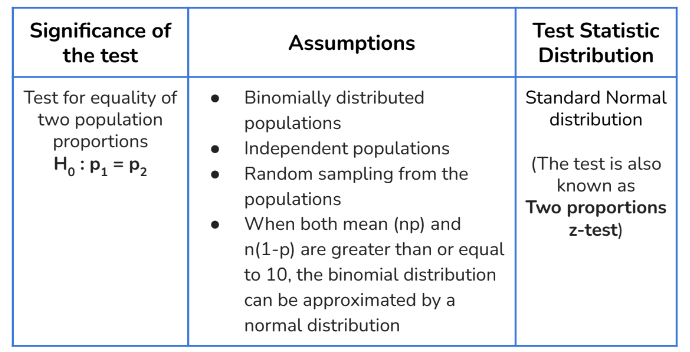

### *Step 5: Calculating the p-value*

In [ ]:
# We will run the code to import the required function
from statsmodels.stats.proportion import proportions_ztest   

# write the code to calculate the p-value
test_stat, p_value = proportions_ztest([new_converted, old_converted] , [n_treatment, n_control], alternative ='larger')   


print('The p-value is', p_value)

The p-value is 0.008026308204056278


### *Step 6: Comparing the p-value with  α*

In [ ]:
# We will print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


**Observations:**

As the p-value (~0.008) is less than the level of significance ( α=0.05 .), we can reject the null hypothesis. Hence, we do have enough evidence to support the claim that the proportion of converted users of the new landing page is larger than the proportion of converted users of the existing page.

### Step 7:  Drawing inference





**Insights:**

1. To test the alternative hypotheses that the proportion of converted users of the new landing page is larger than the proportion of converted users of the existing page, we used **Two Sample (Proportion) Z-Test**. 
2. All the Z-Test assumptions were satisfied.
3. The p-value (~0.008) is less than the level of significance ( α=0.05 .), we can reject the null hypothesis. Hence, we do have enough evidence to support the claim that the proportion of converted users of the new landing page is larger than the proportion of converted users of the existing page.

**Conclusion:** The conversion rate for the new page is greater than the conversion rate for the old page.

## **3. Is the conversion and preferred language are independent or related?**

### *Visual Analysis*

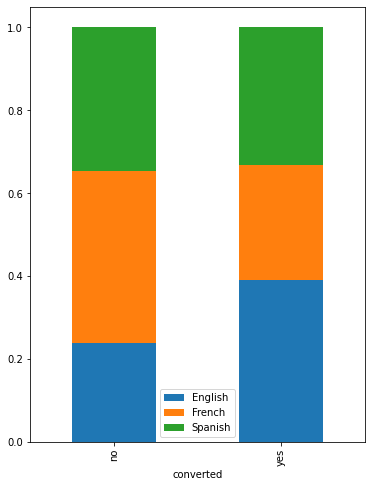

In [ ]:
# We can visually plot the dependency between conversion status and preferred language:
pd.crosstab(df['converted'],df['language_preferred'],normalize='index').plot(kind="bar", figsize=(6,8), stacked=True)
plt.legend()
plt.show()

In [ ]:
# We will create a variable to separate converted (yes) from the 'converted'data:
df_converted = df[df['converted'] == 'yes']
# Next, we run the value count for the df_converted data based on the language preferred:
df_converted['language_preferred'].value_counts()

English    21
Spanish    18
French     15
Name: language_preferred, dtype: int64

In [ ]:
# We can also run the value count as a percentage:
df_converted['language_preferred'].value_counts(normalize=True)

English    0.388889
Spanish    0.333333
French     0.277778
Name: language_preferred, dtype: float64

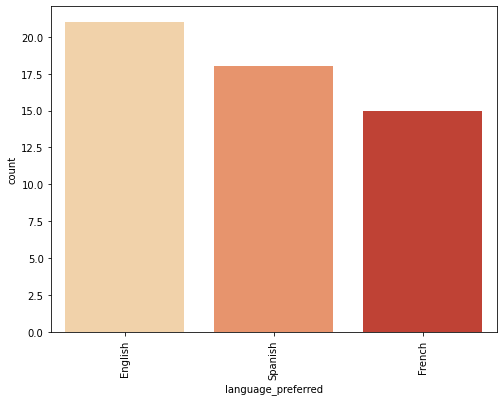

In [ ]:
# To visualize the data, we can create a countplot 
plt.figure(figsize = (8,6))
sns.countplot(data = df_converted, x = 'language_preferred',palette='OrRd'); 
plt.xticks(rotation=90)
plt.show()

**Observations:**

From the analysis of the visual data we can see that users with language preferred as English have higher conversion rate (38%) than the users with language preferred as Spanish (33%) or French (27%).

### *Step 1: Defining the null and alternate hypotheses*


- 'convertion rate' and 'preferred language' are two categorical variables.
- We want to see if the conversion reate and preferred language are independent or related.

**The null and alternative hypotheses for this case can be formulated as follows:**



$H_0$: Conversion rate is independent of preferred language.

$H_a$: Conversion rate depends on preferred language.

### *Step 2: Selecting Appropriate test*

This is a problem of the test of independence, concerning two categorical variables - converted status and preferred language. Based on this, **Chi-square test of independence** will be the appropriate test to use.

### *Step 3: Deciding the significance level*

Based on the problem statement, to determine the effectiveness of the new landing page in gathering new subscribers for the news portal, we will perform a statistical analysis at a significance level of 5%:  α=0.05 .

### *Step 4: Collecting and preparing data* 

In [ ]:
# We will run the code to create a contingency table showing the distribution of the two categorical variables
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['converted'], df['language_preferred'])  

contingency_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


**Let's test whether the Chi-square test of independence assumptions are satisfied or not:**

**Categorical variables** - Yes, both tested variables are categorical: converted (yes/no), language preferred (English, French, Spanish).


**Expected value of the number of sample observations in each level of the variable is at least 5** - Yes, the number of observations in each level is greater than 5.


**Random sampling from the population** - Yes, we are informed that the collected sample is a simple random sample.

**The Chi-square test of independence assumptions are all satisfied.**

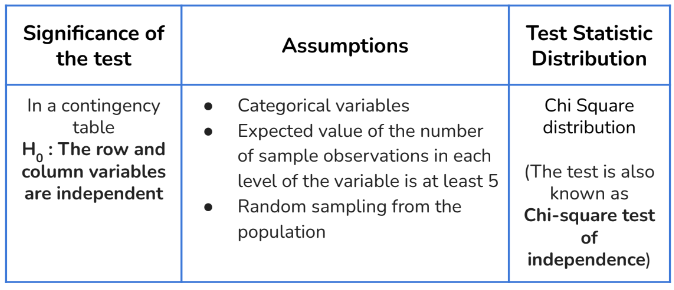

### *Step 5: Calculating the p-value*

In [ ]:
# We will run the code to import the required function
from scipy.stats import chi2_contingency 

# write the code to calculate the p-value
chi2, p_value, dof, exp_freq = chi2_contingency(contingency_table)   

print('The p-value is', p_value)

The p-value is 0.21298887487543447


### *Step 6: Comparing the p-value with  α*

In [ ]:
# We will print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Drawing inference

**Insights:**

1. To test the alternative hypotheses that conversion rate depends on preferred language,we used **Chi-square test of independence**. 
2. All the Chi-square test of independence assumptions were satisfied.
3. The p-value (~0.212) is greater than the level of significance ( α=0.05 .), we fail to reject the null hypothesis. Hence, we do not have enough evidence to support the claim that that conversion rate depends on preferred language.

**Conclusion:** The conversion to subscriber rate of users is independent from the preferred language: English, Spanish or French.

## **4. Is the time spent on the new page same for the different language users?**

### *Visual Analysis*

In [ ]:
# We will create a new DataFrame for users who got served the new page
df_new = df[df['landing_page'] == 'new']

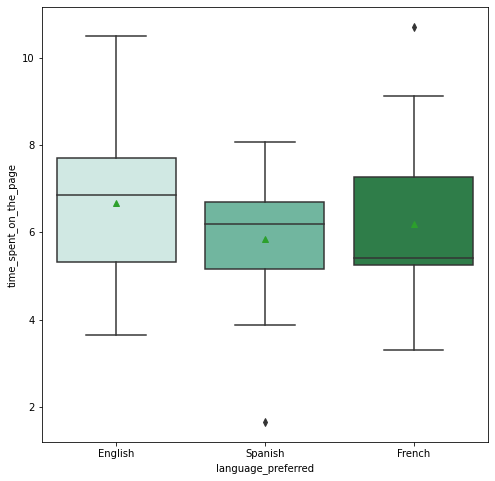

In [ ]:
# complete the code to visually plot the time spent on the new page for different language users
plt.figure(figsize=(8,8))
sns.boxplot(x = 'language_preferred', y = 'time_spent_on_the_page', showmeans = True, data = df_new,palette='BuGn')
plt.show()

In [ ]:
# complete the code to calculate the mean time spent on the new page for different language users
df_new.groupby(['language_preferred'])['time_spent_on_the_page'].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

**Observations:**

* From the overall observations of the boxplot visual we can see that time spent on the new landing page for different language preferences are not very same. Spanish and French language groups have some outliers, with Spanish outlier to be below the minimum time spent (around 2 minutes) and French outlier being above the maximum time spent level (9 minutes). 

*   From the mean comparisons of time spent on the new landing page grouped by language preferred we can see that English language users have the highest mean of 6.6 minutes, compared to French - 6.1 minutes, and Spanish - 5.8 minutes.

### *Step 1: Defining the null and alternate hypotheses*

- We will be comparing the means of three different population.
- We will be testing if the time spent on the new page is same for the different language users.

**The null and alternative hypotheses for this case can be formulated as follows:**



$H_0$: Time spent on the new page is same for the different language users.

$H_a$: Time spent on the new page is not same for the different language users.


Let $\mu_1, \mu_2, \mu_3$ be the means of time spent on the new page for three groups of preferred language: English, Spanish, French respectively.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ Time spent on the new page is not same for the different language users/ At least one mean is different from the rest.

### *Step 2: Selecting Appropriate test*

This is a problem that includes more than two sample populations and more than two population means. Based on this, **One-Way ANOVA** test will be the appropriate test to use.

### *Step 3: Deciding the significance level*

Based on the problem statement, to determine the effectiveness of the new landing page in gathering new subscribers for the news portal, we will perform a statistical analysis at a significance level of 5%:  α=0.05 .

### *Step 4: Collecting and preparing data* 

In [ ]:
# We will create a subsetted data frame of the time spent on the new page by each three language users 
time_spent_English = df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page']
time_spent_Spanish = df_new[df_new['language_preferred']=='Spanish']['time_spent_on_the_page']   
time_spent_French = df_new[df_new['language_preferred']=='French']['time_spent_on_the_page'] 

There are three assumptions that need to be satisfied for the One-way ANOVA test to be used:

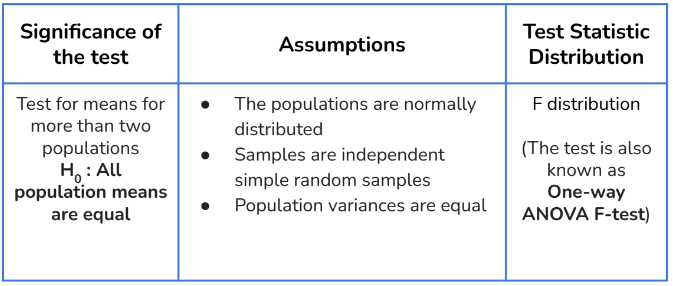

The normality and equality of variance assumptions need to be checked. 

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

**Shapiro-Wilk’s test**

We will test the null hypothesis

>$H_0:$ Time spent follows a normal distribution 

against the alternative hypothesis

>$H_a:$ Time spent does not follow a normal distribution

The [`shapiro()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html) function of Scipy will be used to compute the test statistic and p-value.

In [ ]:
#Test for Normality
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(df_new['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


Since p-value of the test is very large, we fail to reject the null hypothesis that the data follows the normal distribution.

**Levene’s test**

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

The [`levene()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html) function of Scipy will be used to compute the test statistic and p-value.

In [ ]:
#Test for Homogeneity of Variance
# use levene function from scipy.stats library for this test
# find the p-value
statistic, p_value = stats.levene(time_spent_English,time_spent_Spanish,time_spent_French)                         
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the p-value is large, we fail to reject the null hypothesis of homogeneity of variances.

**Let's summarize whether the assumptions are satisfied or not**

* The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.

### *Step 5: Calculating the p-value*

- We will use the `f_oneway()` function from the `scipy.stats` library to perform a one-way ANOVA test.
- The `f_oneway()` function takes the sample observations from the different groups and returns the test statistic and the p-value for the test. 
-The sample observations are the values of time spent on the new landing page with respect to the preferred language groups.

In [ ]:
# import the required function
from scipy.stats import f_oneway

# find the p-value
test_stat, p_value = f_oneway(time_spent_English, time_spent_French, time_spent_Spanish)
print('The p-value is ', p_value)

The p-value is  0.43204138694325955


### *Step 6: Comparing the p-value with  α*

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Drawing inference

**Insights:**

1. To test the alternative hypotheses that conversion rate depends on preferred language,we used **One-Way ANOVA** test. 
2. All the One-Way ANOVA test assumptions were satisfied.
3. The p-value (~0.432) is greater than the level of significance ( α=0.05 .), we fail to reject the null hypothesis. Hence, we do not have enough evidence to support the claim that time spent on the new page is significantly different for the different language users.

**Conclusion:** Although visual analysis observations showed the differences in the means of the time spent on the new landing page for three different users of language users, based on the statistical analysis, the mean differences are not significantly different to reject the null hypotheses.

# **Conclusion and Business Recommendations**

---




We analyzed the data of a news company that has researched and created a new landing page with new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected.

With a significance level of 5% to determine the effectiveness of the new landing page in gathering new subscribers for the news portal the objective was to answer the following questions:  

1. Do the users spend more time on the new landing page than on the existing landing page?

2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

3. Does the converted status depend on the preferred language? 

4. Is the time spent on the new page the same for the different language users?

### **Conclusions:**
1. **Do the users spend more time on the new landing page than the existing landing page?** - Statistical analysis provided enough evidence to support the claim that the users spent more time on the new landing page than the existing page.
2. **Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?** - There was enough statistical evidence to say that the conversion rate (users who decided to subscribe) of the new landing page was greater than the conversion rate of the existing landing page users.

3. **Does the converted status depend on the preferred language?** - The outcomes of the statistical analysis of the data did not find a strong evidence to say that conversion status was connected to the users' preferred language. We can conclude that the converted status does not depend on the preferred language.
4. **Is the time spent on the new page the same for the different language users?** - The differences of time spent on the new page was not statistically significant among different language users. Hence, we can say that the time spent on the new page is more or less the same for the different language users.

### **Business Recommendations:**

 - The new landing page was effective. Since it was evident that the users of the e-news spend more time on the new landing page and also there were more converted statuses among the users of the new landing page, it is recommended that the company switched to the new landing page for all users.
 - There are balanced number of users in all language groups, and all three groups are inpendent in regards to their converted rates and time spent on the landing page. It is recommended to keep the language options to avoid losing customers, and maybe adding new popular languages to gain more subscribed customers in the future.
 

In [ ]:
%%shell
jupyter nbconvert --to html ///////content/Full_Code_Project_2_MO.ipynb

[NbConvertApp] Converting notebook ///////content/Full_Code_Project_2_MO.ipynb to html
[NbConvertApp] Writing 1006930 bytes to ///////content/Full_Code_Project_2_MO.html


___